In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/kaggle-survey-2020/kaggle_survey_2020_responses.csv
/kaggle/input/kaggle-survey-2020/supplementary_data/kaggle_survey_2020_methodology.pdf
/kaggle/input/kaggle-survey-2020/supplementary_data/kaggle_survey_2020_answer_choices.pdf
/kaggle/input/plotly-country-code-mapping/2014_world_gdp_with_codes.csv


# General Information                                                

In October 2020, Kaggle launched a big online survey for kagglers. There were multiple choice questions and some forms for open answers. 

Survey received 20,036 usable respondents from different countries and territories. 
In this kernel I will try to analyse this data and provide various insights. 

The Main tools that I will use in this kernel are Python as language and seaborn and plotly for visualisation.

I have decided to perform the analysis based on the country of the responders.

In [2]:
!pip install seaborn --upgrade

     |████████████████████████████████| 283 kB 883 kB/s 
  Attempting uninstall: seaborn
    Found existing installation: seaborn 0.10.0
    Uninstalling seaborn-0.10.0:
      Successfully uninstalled seaborn-0.10.0
You should consider upgrading via the '/opt/conda/bin/python3.7 -m pip install --upgrade pip' command.


In [3]:
# Import libraries
import numpy as np 
import pandas as pd 
import os
import math
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from plotly import tools
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode, iplot
import warnings
warnings.filterwarnings("ignore")
init_notebook_mode(connected=True)
pd.set_option('display.max_columns', None)
from ipywidgets import interact, interactive, interact_manual
import ipywidgets as widgets
import colorlover as cl

In [4]:
sns.__version__

'0.11.0'

In [5]:
#loading data
df = pd.read_csv(r'../input/kaggle-survey-2020/kaggle_survey_2020_responses.csv')


**List of questions**

Below are the list of all 35 questions asked during the survey

In [6]:
question = df.iloc[0]
with pd.option_context("display.max_rows", 1000):
 for k, v in question.items():
    print(k, v)
 



Time from Start to Finish (seconds) Duration (in seconds)
Q1 What is your age (# years)?
Q2 What is your gender? - Selected Choice
Q3 In which country do you currently reside?
Q4 What is the highest level of formal education that you have attained or plan to attain within the next 2 years?
Q5 Select the title most similar to your current role (or most recent title if retired): - Selected Choice
Q6 For how many years have you been writing code and/or programming?
Q7_Part_1 What programming languages do you use on a regular basis? (Select all that apply) - Selected Choice - Python
Q7_Part_2 What programming languages do you use on a regular basis? (Select all that apply) - Selected Choice - R
Q7_Part_3 What programming languages do you use on a regular basis? (Select all that apply) - Selected Choice - SQL
Q7_Part_4 What programming languages do you use on a regular basis? (Select all that apply) - Selected Choice - C
Q7_Part_5 What programming languages do you use on a regular basis? (S

In [7]:
df_1 = df.drop([0])
print(df_1.shape)

(20036, 355)


In [8]:
df_1.head(2)

,Time from Start to Finish (seconds),Q1,Q2,Q3,Q4,Q5,Q6,Q7_Part_1,Q7_Part_2,Q7_Part_3,Q7_Part_4,Q7_Part_5,Q7_Part_6,Q7_Part_7,Q7_Part_8,Q7_Part_9,Q7_Part_10,Q7_Part_11,Q7_Part_12,Q7_OTHER,Q8,Q9_Part_1,Q9_Part_2,Q9_Part_3,Q9_Part_4,Q9_Part_5,Q9_Part_6,Q9_Part_7,Q9_Part_8,Q9_Part_9,Q9_Part_10,Q9_Part_11,Q9_OTHER,Q10_Part_1,Q10_Part_2,Q10_Part_3,Q10_Part_4,Q10_Part_5,Q10_Part_6,Q10_Part_7,Q10_Part_8,Q10_Part_9,Q10_Part_10,Q10_Part_11,Q10_Part_12,Q10_Part_13,Q10_OTHER,Q11,Q12_Part_1,Q12_Part_2,Q12_Part_3,Q12_OTHER,Q13,Q14_Part_1,Q14_Part_2,Q14_Part_3,Q14_Part_4,Q14_Part_5,Q14_Part_6,Q14_Part_7,Q14_Part_8,Q14_Part_9,Q14_Part_10,Q14_Part_11,Q14_OTHER,Q15,Q16_Part_1,Q16_Part_2,Q16_Part_3,Q16_Part_4,Q16_Part_5,Q16_Part_6,Q16_Part_7,Q16_Part_8,Q16_Part_9,Q16_Part_10,Q16_Part_11,Q16_Part_12,Q16_Part_13,Q16_Part_14,Q16_Part_15,Q16_OTHER,Q17_Part_1,Q17_Part_2,Q17_Part_3,Q17_Part_4,Q17_Part_5,Q17_Part_6,Q17_Part_7,Q17_Part_8,Q17_Part_9,Q17_Part_10,Q17_Part_11,Q17_OTHER,Q18_Part_1,Q18_Part_2,Q18_Part_3,Q18_Part_4,Q18_Part_5,Q18_Part_6,Q18_OTHER,Q19_Part_1,Q19_Part_2,Q19_Part_3,Q19_Part_4,Q19_Part_5,Q19_OTHER,Q20,Q21,Q22,Q23_Part_1,Q23_Part_2,Q23_Part_3,Q23_Part_4,Q23_Part_5,Q23_Part_6,Q23_Part_7,Q23_OTHER,Q24,Q25,Q26_A_Part_1,Q26_A_Part_2,Q26_A_Part_3,Q26_A_Part_4,Q26_A_Part_5,Q26_A_Part_6,Q26_A_Part_7,Q26_A_Part_8,Q26_A_Part_9,Q26_A_Part_10,Q26_A_Part_11,Q26_A_OTHER,Q27_A_Part_1,Q27_A_Part_2,Q27_A_Part_3,Q27_A_Part_4,Q27_A_Part_5,Q27_A_Part_6,Q27_A_Part_7,Q27_A_Part_8,Q27_A_Part_9,Q27_A_Part_10,Q27_A_Part_11,Q27_A_OTHER,Q28_A_Part_1,Q28_A_Part_2,Q28_A_Part_3,Q28_A_Part_4,Q28_A_Part_5,Q28_A_Part_6,Q28_A_Part_7,Q28_A_Part_8,Q28_A_Part_9,Q28_A_Part_10,Q28_A_OTHER,Q29_A_Part_1,Q29_A_Part_2,Q29_A_Part_3,Q29_A_Part_4,Q29_A_Part_5,Q29_A_Part_6,Q29_A_Part_7,Q29_A_Part_8,Q29_A_Part_9,Q29_A_Part_10,Q29_A_Part_11,Q29_A_Part_12,Q29_A_Part_13,Q29_A_Part_14,Q29_A_Part_15,Q29_A_Part_16,Q29_A_Part_17,Q29_A_OTHER,Q30,Q31_A_Part_1,Q31_A_Part_2,Q31_A_Part_3,Q31_A_Part_4,Q31_A_Part_5,Q31_A_Part_6,Q31_A_Part_7,Q31_A_Part_8,Q31_A_Part_9,Q31_A_Part_10,Q31_A_Part_11,Q31_A_Part_12,Q31_A_Part_13,Q31_A_Part_14,Q31_A_OTHER,Q32,Q33_A_Part_1,Q33_A_Part_2,Q33_A_Part_3,Q33_A_Part_4,Q33_A_Part_5,Q33_A_Part_6,Q33_A_Part_7,Q33_A_OTHER,Q34_A_Part_1,Q34_A_Part_2,Q34_A_Part_3,Q34_A_Part_4,Q34_A_Part_5,Q34_A_Part_6,Q34_A_Part_7,Q34_A_Part_8,Q34_A_Part_9,Q34_A_Part_10,Q34_A_Part_11,Q34_A_OTHER,Q35_A_Part_1,Q35_A_Part_2,Q35_A_Part_3,Q35_A_Part_4,Q35_A_Part_5,Q35_A_Part_6,Q35_A_Part_7,Q35_A_Part_8,Q35_A_Part_9,Q35_A_Part_10,Q35_A_OTHER,Q36_Part_1,Q36_Part_2,Q36_Part_3,Q36_Part_4,Q36_Part_5,Q36_Part_6,Q36_Part_7,Q36_Part_8,Q36_Part_9,Q36_OTHER,Q37_Part_1,Q37_Part_2,Q37_Part_3,Q37_Part_4,Q37_Part_5,Q37_Part_6,Q37_Part_7,Q37_Part_8,Q37_Part_9,Q37_Part_10,Q37_Part_11,Q37_OTHER,Q38,Q39_Part_1,Q39_Part_2,Q39_Part_3,Q39_Part_4,Q39_Part_5,Q39_Part_6,Q39_Part_7,Q39_Part_8,Q39_Part_9,Q39_Part_10,Q39_Part_11,Q39_OTHER,Q26_B_Part_1,Q26_B_Part_2,Q26_B_Part_3,Q26_B_Part_4,Q26_B_Part_5,Q26_B_Part_6,Q26_B_Part_7,Q26_B_Part_8,Q26_B_Part_9,Q26_B_Part_10,Q26_B_Part_11,Q26_B_OTHER,Q27_B_Part_1,Q27_B_Part_2,Q27_B_Part_3,Q27_B_Part_4,Q27_B_Part_5,Q27_B_Part_6,Q27_B_Part_7,Q27_B_Part_8,Q27_B_Part_9,Q27_B_Part_10,Q27_B_Part_11,Q27_B_OTHER,Q28_B_Part_1,Q28_B_Part_2,Q28_B_Part_3,Q28_B_Part_4,Q28_B_Part_5,Q28_B_Part_6,Q28_B_Part_7,Q28_B_Part_8,Q28_B_Part_9,Q28_B_Part_10,Q28_B_OTHER,Q29_B_Part_1,Q29_B_Part_2,Q29_B_Part_3,Q29_B_Part_4,Q29_B_Part_5,Q29_B_Part_6,Q29_B_Part_7,Q29_B_Part_8,Q29_B_Part_9,Q29_B_Part_10,Q29_B_Part_11,Q29_B_Part_12,Q29_B_Part_13,Q29_B_Part_14,Q29_B_Part_15,Q29_B_Part_16,Q29_B_Part_17,Q29_B_OTHER,Q31_B_Part_1,Q31_B_Part_2,Q31_B_Part_3,Q31_B_Part_4,Q31_B_Part_5,Q31_B_Part_6,Q31_B_Part_7,Q31_B_Part_8,Q31_B_Part_9,Q31_B_Part_10,Q31_B_Part_11,Q31_B_Part_12,Q31_B_Part_13,Q31_B_Part_14,Q31_B_OTHER,Q33_B_Part_1,Q33_B_Part_2,Q33_B_Part_3,Q33_B_Part_4,Q33_B_Part_5,Q33_B_Part_6,Q33_B_Part_7,Q33_B_OTHER,Q34_B_Part_1,Q34_B_Part_2,Q34_B_Part_3,Q34_B_Part_4,Q34_B_Part_5,Q34_B_Part_6,Q34_B_Part_7,Q34_

**Responders in different countries**

In [9]:
country_count = df_1['Q3'].value_counts().reset_index()
country_count

,index,Q3
0,India,5851
1,United States of America,2237
2,Other,1388
3,Brazil,694
4,Japan,638
5,Russia,582
6,United Kingdom of Great Britain and Northern I...,489
7,Nigeria,476
8,China,474
9,Germany,404


In [10]:
country_count.columns = ['country', 'people']
country_count.columns

Index(['country', 'people'], dtype='object')

In [11]:
# To plot the data in the map , I will use plotly dataset to get the country code
country_code = pd.read_csv('../input/plotly-country-code-mapping/2014_world_gdp_with_codes.csv')
country_code.columns = [i.lower() for i in country_code.columns]


In [12]:
country_count.loc[country_count['country'] == 'United States of America', 'country'] = 'United States'
country_count.loc[country_count['country'] == 'United Kingdom of Great Britain and Northern Ireland', 'country'] = 'United Kingdom'
country_count.loc[country_count['country'] == 'South Korea', 'country'] = '"Korea, South"'
country_count.loc[country_count['country'] == 'Viet Nam', 'country'] = 'Vietnam'
country_count.loc[country_count['country'] == 'Iran, Islamic Republic of...', 'country'] = 'Iran'
country_count.loc[country_count['country'] == 'Hong Kong (S.A.R.)', 'country'] = 'Hong Kong'
country_count.loc[country_count['country'] == 'Republic of Korea', 'country'] = '"Korea, North"'
country_count = pd.merge(country_count, country_code, on='country')
country_count

,country,people,gdp (billions),code
0,India,5851,2048.00,IND
1,United States,2237,17420.00,USA
2,Brazil,694,2244.00,BRA
3,Japan,638,4770.00,JPN
4,Russia,582,2057.00,RUS
5,United Kingdom,489,2848.00,GBR
6,Nigeria,476,594.30,NGA
7,China,474,10360.00,CHN
8,Germany,404,3820.00,DEU
9,Turkey,344,813.30,TUR


In [13]:
data = [ dict(
        type = 'choropleth',
        locations = country_count['code'],
        z = country_count['people'],
        text = country_count['country'],
        colorscale = 'Viridis',
        autocolorscale = False,
        reversescale = True,
        marker = dict(
            line = dict (
                color = 'rgb(180,180,180)',
                width = 0.5
            ) ),
        colorbar = dict(
            autotick = False,
            title = 'Responders'),
      ) ]

layout = dict(
    title = 'Responders by country',
    geo = dict(
        showframe = False,
        showcoastlines = False,
        projection = dict(
            type = 'Mercator'
        )
    )
)

fig = dict( data=data, layout=layout )
iplot( fig, validate=False, filename='d3-world-map' )

This plot shows clearly that most respondent are from India, USA and Brazil. 

There is not a lot of aspiring Data scientist in Africa, as the Map show only few countries such as South Africa and Nigeria. 

Most country with less or not respondent are undeveloped than countries with most respondent


**Comparing responders by countries**

It would be difficult to analyse each and every country so i have decided to only take the top 3 countries (India, USA and Brazil ) separately and other countries will be grouped in one category.


In [14]:
df_1['Q3_orig'] = df_1['Q3']
df_1.loc[df['Q3'].isin(['United States of America', 'India', 'Brazil']) == False,
              'Q3'] = 'Other countries'


**How long did it take to answer the survey**

In [15]:
df_1['Time from Start to Finish (in Munites)'] = df_1['Time from Start to Finish (seconds)'].astype(int) / 60

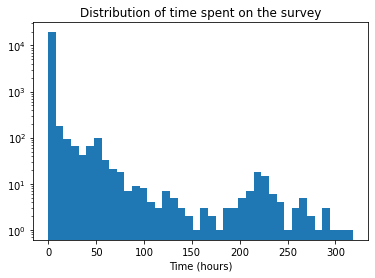

In [16]:
plt.hist(df_1['Time from Start to Finish (in Munites)'] / 60, bins=40);
plt.yscale('log');
plt.title('Distribution of time spent on the survey');
plt.xlabel('Time (hours)');

The graph above show that more than 10 thousand peoples closed the survey almost immediately after opening it,and some people spent days on the survey! I suppose they opened the tab and forgot about it. 


In [17]:
data = []
for i in df_1['Q3'].unique():
    trace = {
            "type": 'violin',
            "x": df_1.loc[(df_1['Q3'] == i) & (df_1['Time from Start to Finish (in Munites)'] < 120),
                               'Q3'],
            "y": df_1.loc[(df_1['Q3'] == i) & (df_1['Time from Start to Finish (in Munites)'] < 120),
                               'Time from Start to Finish (in Munites)'],
            "name": i,
            "meanline": {
                "visible": True
            }
        }
    data.append(trace)

        
fig = {
    "data": data,
    "layout" : {
        "title": "",
        "yaxis": {
            "zeroline": False,
        }
    }
}

fig['layout'].update(title='Distribution of time spent on test by country');
iplot(fig)

In [18]:
data = []
for j, c in enumerate(df_1['Q3'].unique()):
    df_small = df_1.loc[(df_1['Q3'] == c) & (df_1['Time from Start to Finish (in Munites)'] < 60),
                            'Time from Start to Finish (in Munites)']
    trace = go.Histogram(
        x=df_small,
        name=c,
        marker=dict(color=j, opacity=0.5),
        showlegend=False
    )  
    data.append(trace)
fig = go.Figure(data=data)
fig['layout'].update(height=400, width=800, barmode='overlay', title='Distribution of time spent on test by country');
iplot(fig);

**Gender and age**

In [19]:
data = []
for i in df_1['Q1'].unique():
    trace = go.Bar(
        x=df_1.loc[df_1['Q1'] == i, 'Q2'].value_counts().sort_index().index,
        y=df_1.loc[df_1['Q1'] == i, 'Q2'].value_counts().sort_index().values,
        name=i
    )
    data.append(trace)
layout = go.Layout(
    barmode='stack'
)
fig = go.Figure(data=data, layout=layout)
iplot(fig, filename='stacked-bar')

In [20]:
s = pd.crosstab(df_1['Q1'],
                df_1['Q2'], normalize='index').style.background_gradient(cmap='viridis', low=.5, high=0).highlight_null('red')
s

Q2,Man,Nonbinary,Prefer not to say,Prefer to self-describe,Woman
Q1,,,,,
18-21,0.752666,0.002306,0.012107,0.003459,0.229461
22-24,0.749604,0.003170,0.010829,0.002377,0.234020
25-29,0.779855,0.003241,0.010471,0.002244,0.204188
30-34,0.799004,0.002846,0.015653,0.003202,0.179296
35-39,0.794073,0.003516,0.016575,0.001005,0.184832
40-44,0.825340,0.001432,0.010737,0.003579,0.158912
45-49,0.850202,0.001012,0.017206,0.004049,0.127530
50-54,0.866762,0.000000,0.014327,0.002865,0.116046
55-59,0.858881,0.000000,0.031630,0.000000,0.109489


In [21]:
def plot_country_two_vars_dropdown(var1='', var2='', title_name=''):
    df = df_1.copy()
    df[var2] = df[var2].astype('category')
    df[var1] = df[var1].astype('category')

    data = []
    buttons = []
    n_mult = df[var1].nunique()
    n = df['Q3_orig'].nunique() * n_mult
    for j, c in enumerate(df['Q3_orig'].unique()):
        visibility = [False] * n
        for ind, i in enumerate(df[var1].unique()):
            grouped = df.loc[(df[var1] == i) & (df['Q3_orig'] == c),
                                var2].value_counts().sort_index()
            trace = go.Bar(
                x=grouped.index,
                y=grouped.values,
                name=i,

                showlegend=True if j == 0 else False,
                legendgroup=i,
                visible=True if j == 0 else False
            )

            data.append(trace)
        visibility[j*n_mult:j*n_mult + n_mult] = [True] * n_mult
        buttons.append(dict(label = c,
                            method = 'update',
                            args = [{'visible': visibility},
                                    {'title': f'Responders in {c} by {title_name}'}]))
            
    updatemenus = list([dict(active=-1, buttons=buttons, x=1, y=2)])
    layout = dict(height=400, width=800, title=f"Responders in {df['Q3_orig'].unique()[0]} by {title_name}", updatemenus=updatemenus)
    fig = dict(data=data, layout=layout)
    return fig

In [22]:
def plot_country_two_vars(var1='', var2='', title_name=''):
    colors = cl.scales[str(df_1[var1].fillna('').nunique())]['qual']['Paired']
    fig = tools.make_subplots(rows=4, cols=1, subplot_titles=('United States of America', 'Other countries', 'India', 'Brazil'), print_grid=False)
    for j, c in enumerate(df_1['Q3'].unique()):
        data = []
        for ind, i in enumerate(df_1[var1].unique()):
            grouped = df_1.loc[(df_1[var1] == i) & (df_1['Q3'] == c),
                                var2].value_counts().sort_index()
            trace = go.Bar(
                x=grouped.index,
                y=grouped.values,
                name=i,
                marker=dict(color=colors[ind]),
                showlegend=True if j == 0 else False,
                legendgroup=i
            )
            fig.append_trace(trace, j + 1, 1)    

    fig['layout'].update(height=1000, width=800, title=f'Responders in countries by {title_name}');
    return fig
fig = plot_country_two_vars(var1='Q1', var2='Q2', title_name='age and gender')
iplot(fig);

Well, there are much more males then other genders. This could be due to bias or due to higher interest in this sphere. I won't say whether there is a discrimination or barriers - this isn't the place for this. Let's have a look at other things:

In general there are a lot of students or young professionals. I suppose that a lot of young people try to take part in competitions to get experience or medals/prizes, which should boost their career;
It is worth noticing that India has a different trend - while in Russia, USA and other countries kagglers are 25-29 years old, in India most of responders are 18-21. I wonder what is the reason...
Also it is interesting that the ratio of women to other genders is higher in USA than in other countries. Good news!

**Degree**

In [23]:
s = pd.crosstab(df_1['Q2'],
                df_1['Q4']).style.background_gradient(cmap='viridis', low=.5, high=0).highlight_null('red')
s

Q4,Bachelor’s degree,Doctoral degree,I prefer not to answer,Master’s degree,No formal education past high school,Professional degree,Some college/university study without earning a bachelor’s degree
Q2,,,,,,,
Man,5596,1765,281,6125,218,563,898
Nonbinary,16,6,4,19,0,1,4
Prefer not to say,68,37,35,89,6,4,17
Prefer to self-describe,16,6,6,18,2,3,2
Woman,1282,488,73,1608,14,128,171


It isn't surprising that kagglers usually have (or plan to get) higher education degree. Master degree is the most common one (though in India Bachelor degree is more wide-spread).

It is quite interesting that the rate of having a higher degree (master and doctoral) is higher for women than for men.

In [24]:
s = pd.crosstab(df_1['Q1'],
                df_1['Q4']).style.background_gradient(cmap='viridis', low=.5, high=0).highlight_null('red')
s

Q4,Bachelor’s degree,Doctoral degree,I prefer not to answer,Master’s degree,No formal education past high school,Professional degree,Some college/university study without earning a bachelor’s degree
Q1,,,,,,,
18-21,2288,18,76,414,66,38,451
22-24,1702,74,61,1554,21,90,180
25-29,1228,382,72,1985,20,125,111
30-34,642,488,55,1339,38,104,85
35-39,407,431,40,888,24,91,75
40-44,261,314,31,606,21,80,54
45-49,184,191,31,429,25,72,44
50-54,117,170,9,295,12,49,36
55-59,68,94,14,169,7,23,29


It seems that there are two main clusters of kagglers based on education and age: bachelors of 18-29 years and masters of 22-34 years.

In [25]:
fig = plot_country_two_vars(var1='Q2',
                            var2='Q4',
                            title_name='degree')
iplot(fig);

In [26]:
D=df_1
D.Q4[(D.Q4 == "Doctoral degree") |
              (D.Q4 == "Master’s degree") |
              (D.Q4 == "Bachelor’s degree")|
              (D.Q4 == "Professional degree")] = 'With Degree'

D.Q4[D.Q4 != "With Degree"] = 'Without Degree'

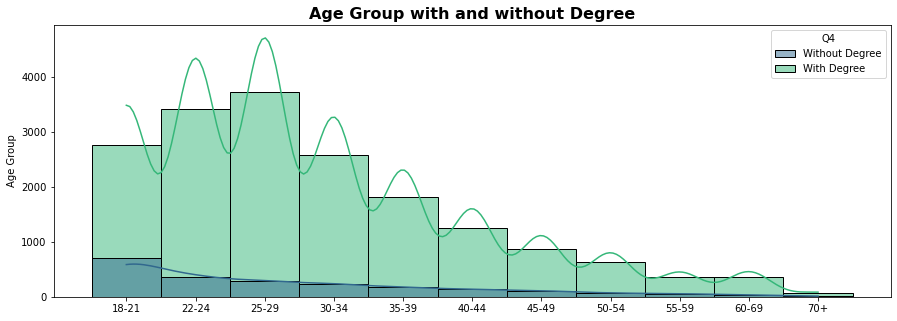

In [27]:
fig, ax = plt.subplots(1,1,figsize=(15,5))
ax1=sns.histplot(D.sort_values(by="Q1"), x="Q1", kde=True, hue='Q4', palette="viridis")
ax1.set_title('Age Group with and without Degree',fontsize=16, fontweight='bold')
ax1.set(xlabel='',ylabel="Age Group");

As you can see in Histplot 〽 how Kaggle users are mostly with University degrees, but the trend of the age group is different from people without a degree. We can see that the people without a degree are mostly young generation and the age grows the number reduce ↘, may be they opt to get into college to improve the skills. For participants with formal degree peaked at 25-29 years and then the number slowly reduces. The difference between participants with degrees and without is quite high.

In [28]:
catD=D.groupby("Q1")["Q4"].value_counts().unstack()
catD["With Degree %"]= ((catD["With Degree"]/sum(catD["With Degree"]))*100).round(1)
catD["Without Degree %"]= ((catD["Without Degree"]/sum(catD["Without Degree"]))*100).round(1)
catD.sort_index(inplace=True)
catD

Q4,With Degree,Without Degree,With Degree %,Without Degree %
Q1,,,,
18-21,2758,711,15.5,32.3
22-24,3420,366,19.2,16.7
25-29,3720,291,20.9,13.2
30-34,2573,238,14.4,10.8
35-39,1817,174,10.2,7.9
40-44,1261,136,7.1,6.2
45-49,876,112,4.9,5.1
50-54,631,67,3.5,3.0
55-59,354,57,2.0,2.6


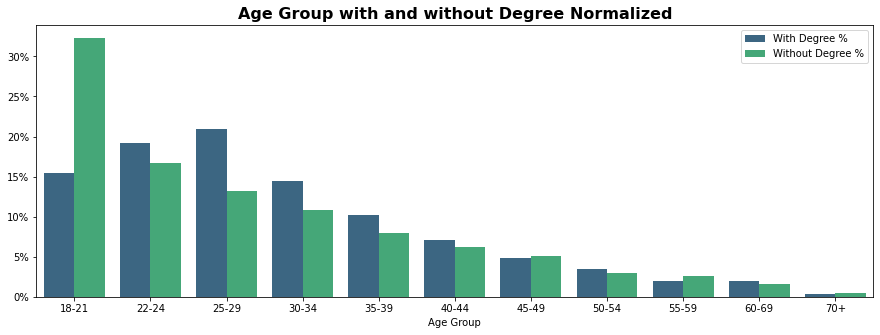

In [29]:
import matplotlib.ticker as mtick

catNew=catD[["With Degree %","Without Degree %"]].stack()
catNew=pd.DataFrame(catNew).reset_index().rename(columns={0:"count"})
fig, ax = plt.subplots(1,1,figsize=(15,5))
ax1=sns.barplot( data=catNew.sort_values(by="Q1"),x='Q1',y='count', hue='Q4', palette="viridis")
ax1.set_title('Age Group with and without Degree Normalized',fontsize=16, fontweight='bold')
ax1.set(xlabel='Age Group',ylabel="")
ax1.legend(title="");
ax.yaxis.set_major_formatter(mtick.FormatStrFormatter('%.0f%%'));

When we look deeper into the percentage of participants with and without Degree it makes it clear that most of the people who are using Kaggle are young generation and without a degree, with more than 30+ % of participants are in the age range of 18-21 years. We will be looking at more parameters to determine the reasons and look deep into the specific pattern.

**Major**

In [30]:
def plot_country_one_var(var='', title_name=''):
    data = []
    for j, c in enumerate(df_1['Q3'].unique()):
        grouped = df_1.loc[df_1['Q3'] == c,
                                var].value_counts().sort_index()
        grouped = grouped / grouped.sum()
        if var == 'Q24':
            map_dict = {'0-10,000': 0,
                        '10-20,000': 1,
                        '100-125,000': 10,
                        '125-150,000': 11,
                        '150-200,000': 12,
                        '20-30,000': 2,
                        '200-250,000': 13,
                        '250-300,000': 14,
                        '30-40,000': 3,
                        '300-400,000': 15,
                        '40-50,000': 4,
                        '400-500,000': 16,
                        '50-60,000': 5,
                        '60-70,000': 6,
                        '70-80,000': 7,
                        '80-90,000': 8,
                        '90-100,000': 9,
                        '500,000+': 17,
                        'I do not wish to disclose my approximate yearly compensation': 18}
            grouped = grouped.reset_index()
            grouped.columns = ['salary', 'counts']
            grouped['sorting'] = grouped['salary'].apply(lambda x: map_dict[x])
            grouped = grouped.sort_values('sorting', ascending=True)
            trace = go.Bar(
                x=grouped['salary'],
                y=grouped['counts'],
                name=c,
                marker=dict(color=j),
                showlegend=True
            )
            data.append(trace)
        elif var == 'Q6':
            map_dict = {'I have never written code but I want to learn': 8,
                        '5-10 years': 3,
                        '3-5 years': 2,
                        '< 1 year': 0,
                        '1-2 years': 1,
                        '10-20 years': 4,
                        '20-30 years': 5,
                        '30-40 years': 6,
                        'I have never written code and I do not want to learn': 9,
                        '40+ years': 7}
            grouped = grouped.reset_index()
            grouped.columns = ['salary', 'counts']
            grouped['sorting'] = grouped['salary'].apply(lambda x: map_dict[x])
            grouped = grouped.sort_values('sorting', ascending=True)
            trace = go.Bar(
                x=grouped['salary'],
                y=grouped['counts'],
                name=c,
                marker=dict(color=j),
                showlegend=True
            )
            data.append(trace)
        else:
            trace = go.Bar(
                x=grouped.index,
                y=grouped.values,
                name=c,
                marker=dict(color=j),
                showlegend=True
            )
            data.append(trace)    
    fig = go.Figure(data=data)
    fig['layout'].update(height=400, width=800, title=f'Responders in countries by {title_name}', barmode='group');
    return fig

fig = plot_country_one_var(var='Q5', title_name='major')
iplot(fig);

In [31]:
s = pd.crosstab(df_1['Q2'],
                df_1['Q5'], normalize='index').style.background_gradient(cmap='viridis', low=.01, high=0).highlight_null('red')
s

Q5,Business Analyst,Currently not employed,DBA/Database Engineer,Data Analyst,Data Engineer,Data Scientist,Machine Learning Engineer,Other,Product/Project Manager,Research Scientist,Software Engineer,Statistician,Student
Q2,,,,,,,,,,,,,
Man,0.041201,0.081154,0.006768,0.072940,0.024248,0.144171,0.060980,0.093179,0.039624,0.059075,0.109738,0.014391,0.252530
Nonbinary,0.062500,0.083333,0.041667,0.020833,0.000000,0.166667,0.000000,0.041667,0.020833,0.083333,0.083333,0.020833,0.375000
Prefer not to say,0.044898,0.122449,0.016327,0.044898,0.028571,0.114286,0.057143,0.085714,0.032653,0.122449,0.114286,0.004082,0.212245
Prefer to self-describe,0.018868,0.132075,0.000000,0.094340,0.018868,0.150943,0.075472,0.075472,0.037736,0.037736,0.113208,0.000000,0.245283
Woman,0.042015,0.101266,0.004309,0.093725,0.016159,0.117964,0.036628,0.078643,0.021007,0.064368,0.070024,0.018583,0.335308


People come from various backgrounds, though most come from math and CS, which isn't surprising. On the other hand, we can say, that those who come from non-relevant background could have higher interest and drive in growing as a DS.

In is quite interesting that in India most kagglers have CS or engineering degree and business disciplines as well as maths aren't as popular as in other countries.

# **Industry and profession**

In [32]:
countsDf = df_1['Q5'].value_counts()
trace1 = go.Bar(
                x = countsDf.index,
                y = countsDf.values,
                name = "Kaggle",
                marker = dict(color = 'gold'),
                text = countsDf.index)
data = [trace1]
layout = go.Layout(barmode = "group",title='Title', yaxis= dict(title='Counts'),showlegend=False)
fig = go.Figure(data = data, layout = layout)
iplot(fig)

I know that many people has shown this graph, but still let's look at it again. I think that most of these titles can be joined into several groups:

Students can be a separate group,
Let's leave DS also by themselves;
People in research;
Next we have analysts - DA, BA and others, who need a different set of skills, but could be considered a level before DS;
DE and SE who build production systems;
Managers to lead the products;
And others;
This grouping is arbitrate and could be wrong, but let's see what will be the result.